In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

In [2]:
benchmarks_file = '../implementation/results/experiment-4.json'
with open(benchmarks_file) as d:
    benchmarks = json.load(d)

In [3]:
plot_points_linear = []
for benchmark in benchmarks:
    client = benchmark['type']
    chain_size = benchmark['chainSize'] / 365    
    bytesTransferred = benchmark['bytesDownloaded'] + benchmark['bytesUploaded']
    timeToSync = benchmark['timeToSync'] / 1000
    n = benchmark['batchSize' if client != 'superlight' else 'treeDegree']
    plot_points_linear.append([client, chain_size, bytesTransferred, timeToSync, n])

points_df = pd.DataFrame(plot_points_linear, columns=['client', 'chain_size', 'bytesTransferred', 'timeToSync', 'n'])
points_df_mean = points_df.groupby(['client', 'chain_size', 'n']).mean().reset_index()

In [4]:
olc_bt = points_df_mean[points_df_mean['client'] == 'optimisticlight']['bytesTransferred']
olc_tos = points_df_mean[points_df_mean['client'] == 'optimisticlight']['timeToSync']
olc_n = points_df_mean[points_df_mean['client'] == 'optimisticlight']['n']

slc_bt = points_df_mean[points_df_mean['client'] == 'superlight']['bytesTransferred']
slc_tos = points_df_mean[points_df_mean['client'] == 'superlight']['timeToSync']
slc_n = points_df_mean[points_df_mean['client'] == 'superlight']['n']

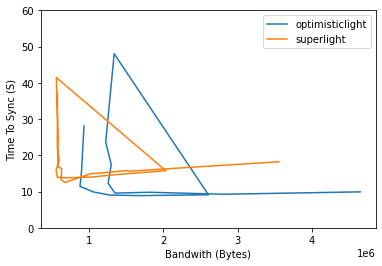

In [5]:
plt.plot(olc_bt, olc_tos, label ='optimisticlight')
plt.plot(slc_bt, slc_tos, label ='superlight')

plt.xlabel('Bandwith (Bytes)')
plt.ylabel('Time To Sync (S)')
# plt.xlim((0, 4e6))
plt.ylim((0, 60))
plt.legend()
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.show()